Final Project
<br>
ECON 220
<br>
Authors: Alex Issokson, Genevieve DeBell, and Khushi Niyyar

Introduction:
<br>
Motivation:
<br>
Importance:

Literature Review:
<br>
Article 1:
<br>
Article 2:
<br>
Article 3:
<br>
Article 4:
<br>
Article 5:
<br>
Article 6:

Data:
<br>
Data Source: The source of data that we will be using is IPUMS USA. IPUMS USA collects, preserves, and harmonizes U.S. census microdata and
provides easy access to this data.
<br>
Variables: The variables that we will be using are total personal income (denoted by "INCTOT" on IPUMS USA), and race (denoted by "RACE" on IPUMS USA).

In [1]:
#Find working directory
import os
path = os.getcwd()
#print(path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Steven Ruggles, Sarah Flood, Matthew Sobek, Danika Brockman, Grace Cooper,  Stephanie Richards, and Megan Schouweiler. IPUMS USA: Version 13.0 [dataset]. Minneapolis, MN: IPUMS, 2023.
https://doi.org/10.18128/D010.V13.0

In [3]:
data = pd.read_csv(r'/Users/Commish/Documents/ECON 220/Data/usa_00003.csv.gz')

In [4]:
data.head()

,SEX,AGE,RACE,RACED,INCTOT
0,1,85,1,100,15000
1,2,67,2,200,4800
2,1,74,1,100,36000
3,1,16,1,100,0
4,1,83,1,100,7200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252599 entries, 0 to 3252598
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   SEX     int64
 1   AGE     int64
 2   RACE    int64
 3   RACED   int64
 4   INCTOT  int64
dtypes: int64(5)
memory usage: 124.1 MB


In [6]:
pd.options.display.float_format = '{:.4f}'.format

In [20]:
data['SEX'].agg(['mean', 'std', 'min', 'max', 'count'])

mean          1.5088
std           0.4999
min           1.0000
max           2.0000
count   3252599.0000
Name: SEX, dtype: float64

In [21]:
data['AGE'].agg(['mean', 'std', 'min', 'max', 'count'])

mean         42.6173
std          23.8774
min           0.0000
max          96.0000
count   3252599.0000
Name: AGE, dtype: float64

In [22]:
data['RACE'].agg(['mean', 'std', 'min', 'max', 'count'])

mean          2.5319
std           2.5995
min           1.0000
max           9.0000
count   3252599.0000
Name: RACE, dtype: float64

In [23]:
data['RACED'].agg(['mean', 'std', 'min', 'max', 'count'])

mean        257.3677
std         267.0510
min         100.0000
max         990.0000
count   3252599.0000
Name: RACED, dtype: float64

In [24]:
data['INCTOT'].agg(['mean', 'std', 'min', 'max', 'count'])

mean    1609700.4247
std     3622365.1070
min      -11100.0000
max     9999999.0000
count   3252599.0000
Name: INCTOT, dtype: float64

In [12]:
#Create "fem" variable: 1 if female, 0 if not
data['Female'] = data['SEX']==2
#Convert to integer
data['Female'] = data['Female'].astype('int')
data[['SEX', 'Female']] # Check

,SEX,Female
0,1,0
1,2,1
2,1,0
3,1,0
4,1,0
...,...,...
3252594,1,0
3252595,2,1
3252596,1,0
3252597,1,0


In [13]:
def white(x):
    if (x == 1):
        return 1
    else:
        return 0
    
data['White'] = data['RACE'].apply(white)
data[['RACE', 'White']].head()

,RACE,White
0,1,1
1,2,0
2,1,1
3,1,1
4,1,1


In [14]:
def black(x):
    if (x == 2):
        return 1
    else:
        return 0
    
data['Black'] = data['RACE'].apply(black)
data[['RACE', 'Black']].head()

,RACE,Black
0,1,0
1,2,1
2,1,0
3,1,0
4,1,0


In [15]:
def other(x):
    if (x >= 3):
        return 1
    else:
        return 0
    
data['Other Race'] = data['RACE'].apply(other)
data[['RACE', 'Other Race']].head()

,RACE,Other Race
0,1,0
1,2,0
2,1,0
3,1,0
4,1,0


In [16]:
data.head()

,SEX,AGE,RACE,RACED,INCTOT,Female,White,Black,Other Race
0,1,85,1,100,15000,0,1,0,0
1,2,67,2,200,4800,1,0,1,0
2,1,74,1,100,36000,0,1,0,0
3,1,16,1,100,0,0,1,0,0
4,1,83,1,100,7200,0,1,0,0


We are not splitting up our variables much besides how they are already separated since race is one of our major variables. If we were to split up personal income into multiple categories, it would look subjective based on what different people consider to be "a lot" versus "a little". So, we will start by having one plot showing total income by race (all of them). Then, we will have another plot showing total personal income by non-white (0) and white (1) people.

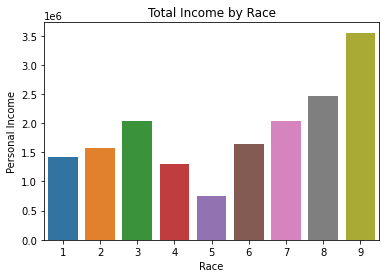

In [19]:
bar = sns.barplot(data = data, x = 'RACE', y = 'INCTOT', ci = None);
bar.set(title = 'Total Income by Race', xlabel = 'Race', ylabel = 'Personal Income');

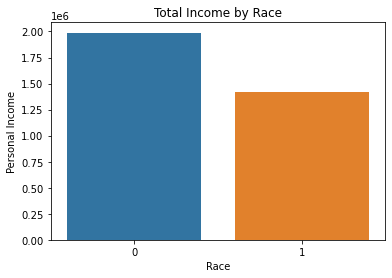

In [26]:
bar = sns.barplot(data = data, x = 'White', y = 'INCTOT', ci = None);
bar.set(title = 'Total Income by Race', xlabel = 'Race', ylabel = 'Personal Income');